# PS4
## Siyuan Peng

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.integrate import quad
import scipy.optimize as opt
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from matplotlib.ticker import FuncFormatter
import matplotlib

### 1

### (a)

In [2]:
def to_percent(y, position):
    s = str(round(100 * y, 3))

    # The percent symbol needs escaping in latex
    if matplotlib.rcParams['text.usetex'] is True:
        return s + r'$\%$'
    else:
        return s + '%'

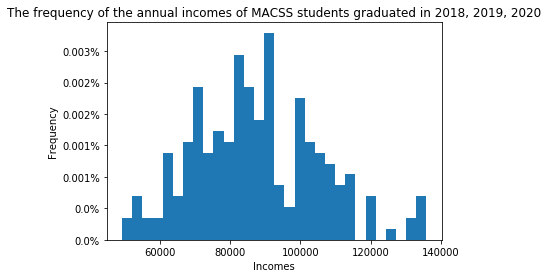

In [3]:
incomes = np.loadtxt('data/incomes.txt')
fig,ax = plt.subplots(figsize=(6,4))
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('The frequency of the annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.hist(x=incomes, bins=30, normed=True)
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### (b) 

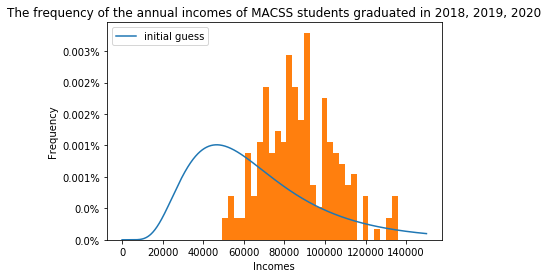

The value of the log likelihood value for this parameterization of the distribution and given this data is -2385.856997808558


In [4]:
def log_norm(x, mu=11, sigma=0.5):
    f_x = 1 / (x * sigma * np.sqrt(2 * np.pi)) * np.exp(-(np.log(x) - mu) ** 2 / (2 * sigma ** 2))
    return f_x
def log_lik(x, mu, sigma):
    pdf_val = log_norm(x, mu, sigma)
    log_lik = np.log(pdf_val)
    log_lik_val = log_lik.sum()
    return log_lik_val

x_set = np.linspace(0,150000, 150001)
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('The frequency of the annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(x_set, log_norm(x_set), label = 'initial guess')
plt.legend(loc='upper left')
ax.hist(x=incomes, bins=30, normed = True)
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()
log_lik_val = log_lik(incomes, 11, 0.5)
print('The value of the log likelihood value for this parameterization of the distribution and given this data is', log_lik_val)

### (c)

In [5]:
def neg_log(params, x):
    mu, sigma = params
    log_lik_val = log_lik(x, mu, sigma)
    neg_log_lik_val = -log_lik_val    
    return neg_log_lik_val

In [6]:
init_mu = 11
init_sig = 0.5
init_guess = np.array([init_mu, init_sig])
bnds = ((None, None), (1e-10, None))
opt_result = opt.minimize(neg_log, init_guess, incomes, bounds=bnds)

if opt_result.success:
    est_mu, est_sig = opt_result.x
    est_log_lik_val = - opt_result.fun
    var_cov_mat = opt_result.hess_inv.todense()
    print('The value of estimated mu is', est_mu, ' and the value of estimated sigma is', est_sig)
    print('The value of the likelihood function is', est_log_lik_val)
    print('The variance-covariance matrix is\n', var_cov_mat)

The value of estimated mu is 11.495016102470231  and the value of estimated sigma is 0.3108792150154579
The value of the likelihood function is -2285.8999545081624
The variance-covariance matrix is
 [[ 4.59466263e-04 -6.65453178e-05]
 [-6.65453178e-05  1.71221449e-03]]


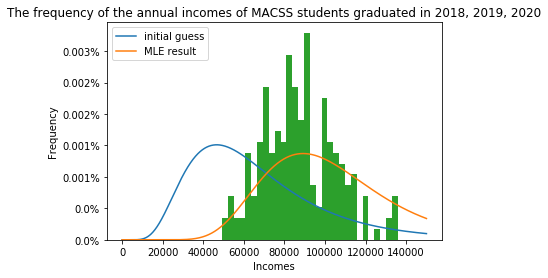

In [7]:
fig,ax = plt.subplots()
ax.set_xlabel('Incomes')
ax.set_ylabel('Frequency')
ax.set_title('The frequency of the annual incomes of MACSS students graduated in 2018, 2019, 2020')
ax.plot(x_set, log_norm(x_set), label = 'initial guess')
plt.legend(loc='upper left')
ax.plot(x_set, log_norm(x_set, est_mu, est_sig), label = 'MLE result')
plt.legend(loc='upper left')
ax.hist(x=incomes, bins=30, normed=True)
formatter = FuncFormatter(to_percent)

# Set the formatter
plt.gca().yaxis.set_major_formatter(formatter)

plt.show()

### (d)

In [8]:
log_lik_h0 = log_lik(incomes, init_mu, init_sig)
print('Hypothesis value log likelihood is', log_lik_h0)
log_lik_mle = log_lik(incomes, est_mu, est_sig)
print('MLE log likelihood is', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('Likelihood ratio value is', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Hypothesis value log likelihood is -2385.856997808558
MLE log likelihood is -2285.8999545081624
Likelihood ratio value is 199.91408660079105
Chi squared of H0 with 2 degrees of freedom p-value =  0.0


### (e)

In [9]:
p_high = 1 - quad(lambda x: log_norm(x, mu=est_mu,sigma=est_sig), 0, 100000)[0]
p_low = quad(lambda x: log_norm(x, mu=est_mu,sigma=est_sig), 0, 75000)[0]
print('The probability of earning more than $100,000 is', '%.2f%%' % (p_high * 100))
print('The probability of earning less than $75,000 is', '%.2f%%' % (p_low * 100))

The probability of earning more than $100,000 is 47.70%
The probability of earning less than $75,000 is 19.28%


## 2

In [10]:
# Import the data
data = []
with open('data/sick.txt') as sick:
    for line in sick:
        data.append(line.rsplit()[0].split(','))
data = np.array(data)
df = pd.DataFrame(data[1:], columns=['sick', 'age', 'children', 'temp_winter']).astype('float64')
df.head()

,sick,age,children,temp_winter
0,1.67,57.47,3.04,54.10
1,0.71,26.77,1.20,36.54
2,1.39,41.85,2.31,32.38
3,1.37,51.27,2.46,52.94
4,1.45,44.22,2.72,45.90


### (a)

In [11]:
def norm_pdf(x, sigma):
    sigma = np.abs(sigma)
    pdf_vals = (1 / (sigma * np.sqrt(2 * np.pi)) *
                    np.exp( - x ** 2 / (2 * sigma ** 2)))     
    return pdf_vals

def log_lik(y, x1, x2, x3, b0, b1, b2, b3, sigma):
    error = y - b0 - x1 * b1 - x2 * b2 - x3 * b3
    pdf = norm_pdf(error, sigma)
    log_lik = np.log(pdf)
    log_lik_val = log_lik.sum()
    return log_lik_val

def crit(params, *args):
    b0, b1, b2, b3, sigma = params
    y, x1, x2, x3 = args
    neg_log_lik = -log_lik(y, x1, x2, x3, b0, b1, b2, b3, sigma)
    return neg_log_lik

In [12]:
init_b0, init_b1, init_b2, init_b3 = (1.0, 0.0, 0.0, 0.0)
init_sig = 0.1
init_guess = np.array([init_b0, init_b1, init_b2, init_b3, init_sig])
y = df['sick']
x1, x2, x3 = df['age'], df['children'], df['temp_winter']
var = (y, x1, x2, x3)
results = opt.minimize(crit, init_guess, args = var)

In [13]:
MLE_b0, MLE_b1, MLE_b2, MLE_b3, MLE_sig = results.x
var_cov_mat = results.hess_inv
est_log_lik_val = -results.fun
print('The MLE result is b0 = {:.4f}, b1 = {:.4f}, b2 = {:.4f}, b3 = {:.4f}, sigma = {:.4f}'.format(MLE_b0, MLE_b1, MLE_b2, MLE_b3, MLE_sig))
print('The value of the log likelihood function is ', est_log_lik_val)
print('The estimated variance covariance matrix of the estimates is \n', var_cov_mat)

The MLE result is b0 = 0.2516, b1 = 0.0129, b2 = 0.4005, b3 = -0.0100, sigma = 0.0030
The value of the log likelihood function is  876.8650462886415
The estimated variance covariance matrix of the estimates is 
 [[ 2.54544044e-08 -1.78744714e-09  2.41230516e-08  2.25060709e-10
  -7.41365711e-08]
 [-1.78744714e-09  5.42683251e-10 -1.76464432e-09 -3.86107909e-10
   5.59234008e-09]
 [ 2.41230516e-08 -1.76464432e-09  2.41466056e-08  2.62174332e-10
  -7.16161474e-08]
 [ 2.25060709e-10 -3.86107909e-10  2.62174332e-10  3.55008410e-10
  -1.04143527e-09]
 [-7.41365711e-08  5.59234008e-09 -7.16161474e-08 -1.04143527e-09
   2.17760694e-07]]


### (b)

In [14]:
log_lik_h0 = log_lik(y, x1, x2, x3, init_b0, init_b1, init_b2, init_b3, init_sig)
print('Hypothesis value log likelihood is', log_lik_h0)
log_lik_mle = log_lik(y, x1, x2, x3, MLE_b0, MLE_b1, MLE_b2, MLE_b3, MLE_sig)
print('MLE log likelihood is', log_lik_mle)
LR_val = 2 * (log_lik_mle - log_lik_h0)
print('Likelihood ratio value is', LR_val)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)
print('Chi squared of H0 with 2 degrees of freedom p-value = ', pval_h0)

Hypothesis value log likelihood is -2253.700688042125
MLE log likelihood is 876.8650462886415
Likelihood ratio value is 6261.131468661533
Chi squared of H0 with 2 degrees of freedom p-value =  0.0
